### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
lista_edad_altura = [("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez",28,1.81),("Javier Araiz Miranda", 30, 1.80)]

In [3]:
lista_alumnos = [[tupla[1], tupla[2]] for tupla in lista_edad_altura]

In [4]:
edad = [e[0] for e in lista_alumnos]
altura = [e[1] for e in lista_alumnos]

In [5]:
X = np.array(altura).reshape(-1,1)
y = np.array(edad).reshape(-1,1)

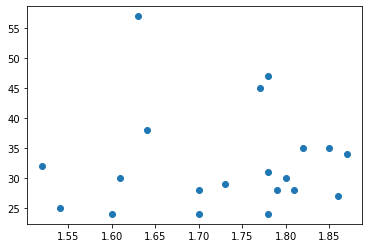

In [6]:
plt.scatter(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
print(model.intercept_ , model.coef_)

[29.3247812] [[1.28281981]]


Text(0.5, 0, 'age')

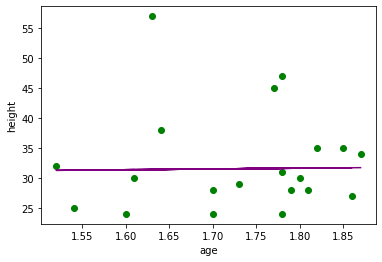

In [10]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel("height")
plt.xlabel("age")

**¿Es una buena técnica para este tipo de problemas? ¿Por qué?**

No porque como se puede observar en el gráfico, los datos no se distribuyen de forma linear y por tanto el modelo linear no se ajusta a los datos.

**¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?**

In [11]:
print(edad, altura, sep="\n")

[34, 31, 24, 28, 27, 25, 30, 32, 45, 28, 24, 57, 29, 35, 47, 24, 38, 35, 28, 30]
[1.87, 1.78, 1.6, 1.79, 1.86, 1.54, 1.61, 1.52, 1.77, 1.7, 1.78, 1.63, 1.73, 1.85, 1.78, 1.7, 1.64, 1.82, 1.81, 1.8]


In [13]:
#dict_edad_altura = {"altura": altura, "edad": edad , "prediction":[e for lista in model.predict(X).tolist() for e in lista]}

In [14]:
dict_edad_altura = {"altura": altura, "edad": edad , "prediction": model.predict(X).flatten()}
df_edad_altura = pd.DataFrame(dict_edad_altura)
df_edad_altura["error"] = df_edad_altura["edad"] - df_edad_altura["prediction"]

In [15]:
df_edad_altura

,altura,edad,prediction,error
0,1.87,34,31.723654,2.276346
1,1.78,31,31.608200,-0.608200
2,1.60,24,31.377293,-7.377293
3,1.79,28,31.621029,-3.621029
4,1.86,27,31.710826,-4.710826
5,1.54,25,31.300324,-6.300324
6,1.61,30,31.390121,-1.390121
7,1.52,32,31.274667,0.725333
8,1.77,45,31.595372,13.404628
9,1.70,28,31.505575,-3.505575


In [16]:
print(f'MSE --> {mean_squared_error(y_test, model.predict(X_test))}\
    \nRMSE --> {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')


MSE --> 71.7722656419731    
RMSE --> 8.471851370389658


**Representa la matriz de correlación, ¿los datos están correlacionados?**

In [17]:
corr_matrix = df_edad_altura[["edad", "altura"]].corr()
corr_matrix

,edad,altura
edad,1.000000,0.018509
altura,0.018509,1.000000


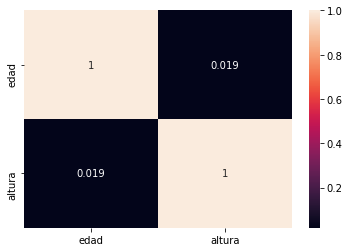

In [18]:
sns.heatmap(corr_matrix, annot = True)

**¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?**

In [19]:
X_2 = X*2
y_2 = y*2

In [20]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2)

In [21]:
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [22]:
print(model_2.intercept_ , model_2.coef_)

[72.36688549] [[-1.91101386]]


In [23]:
model_3 = LinearRegression()
model_3.fit(X_2_train, y_train)

LinearRegression()

In [24]:
print(model_3.intercept_ , model_3.coef_)

[85.01531729] [[-15.43763676]]


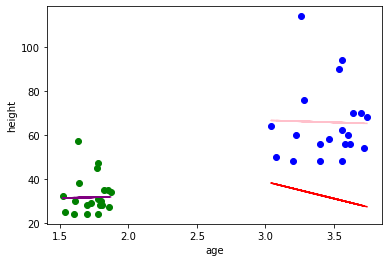

In [25]:
plt.scatter(X, y, color = "green")
plt.scatter(X_2, y_2, color = "blue")
plt.plot(X, model.predict(X), color="purple")
plt.plot(X_2, model_2.predict(X_2), color="pink")
plt.plot(X_2, model_3.predict(X_2), color = "red")
plt.ylabel("height")
plt.xlabel("age")